In [2]:
#import sklearn and load the breastcancer dataset
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import train_test_split

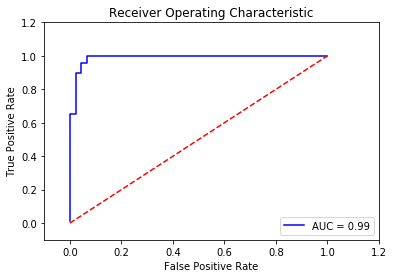

accuracy=95.6140%


In [4]:
"""1a Linear kernal"""
data = load_breast_cancer()
X=data['data']
#normalize to [0,1]
X=(X-np.min(X,0))/(np.max(X,0)-np.min(X,0))
Y=data['target']
#split train data and test data
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=1234)


#use the linear kernel svm to classify
linear_svm=SVC(C=100,kernel='linear',probability=True)
Y_pro=linear_svm.fit(x_train,y_train).predict_proba(x_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, Y_pro[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
 
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print('accuracy={:.4f}%'.format(linear_svm.score(x_test,y_test)*100))

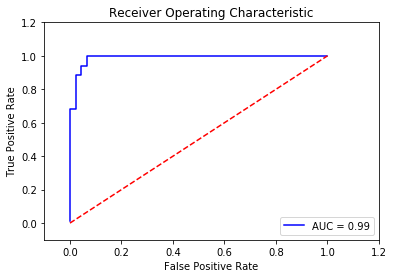

accuracy=96.4912%


In [5]:
"""b) RBF kernal"""
#use the rbf kernel svm to classify
linear_svm=SVC(C=100,kernel='rbf',gamma=0.1,probability=True)
Y_pro=linear_svm.fit(x_train,y_train).predict_proba(x_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, Y_pro[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
 
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print('accuracy={:.4f}%'.format(linear_svm.score(x_test,y_test)*100))

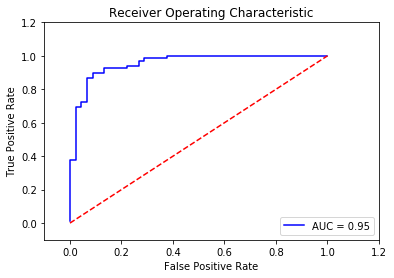

accuracy=67.5439%


In [6]:
"""c) Polynomial kernal"""
#use the poly kernel svm to classify
linear_svm=SVC(C=100,kernel='poly',degree=5,probability=True)
Y_pro=linear_svm.fit(x_train,y_train).predict_proba(x_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, Y_pro[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
 
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print('accuracy={:.4f}%'.format(linear_svm.score(x_test,y_test)*100))

In [7]:
"""Kernal logistic Regression"""
import numpy as np
from sklearn.datasets import load_breast_cancer
from scipy.spatial.distance import cdist
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from scipy import interp
import matplotlib.pyplot as plt 

In [8]:
class Kernel_LR():
    #init Kernel LR
    def __init__(self,sigma=200,lr=0.1,epochs=100):
        self.sigma=sigma#parameter for rbf
        self.lr=lr#learning rate
        self.epochs=epochs#iteration epochs

    def kernel_matrix(self,X):#kernet matrix
        dist=cdist(self.X,X)**2
        self.K=np.exp(-dist/2/self.sigma**2)


    def det_alpha(self):#the gradient of alpha
        self.kernel_matrix(self.X)
        return (self.Y-1/(1+np.exp(-np.dot(self.alpha.T,self.K).reshape((-1,)))))*self.K


    def train(self,X,Y):#train the model
        self.X=np.concatenate((X,np.ones((X.shape[0],1))),1)
        self.Y=Y
        self.alpha = np.random.randn(self.X.shape[0], 1)
        for epoch in range(self.epochs):
            grad=self.lr/self.Y.shape[0]*self.det_alpha()
            self.alpha+=np.sum(grad,0).reshape((-1,1))


    def predict(self,X):#get the label of X
        self.kernel_matrix(np.concatenate((X,np.ones((X.shape[0],1))),1))
        Y_=1/(1+np.exp(-np.dot(self.alpha.T,self.K).reshape((-1,))))
        Y_[Y_>=0.5]=1
        Y_[Y_<0.5]=0
        return Y_

    def predict_proba(self,X):#get the probabilty of X
        self.kernel_matrix(np.concatenate((X, np.ones((X.shape[0], 1))), 1))
        Y_ = 1 / (1 + np.exp(-np.dot(self.alpha.T, self.K).reshape((-1,))))
        return Y_

In [9]:
data = load_breast_cancer()

X=data['data']
Y=data['target']

np.random.seed(1234)

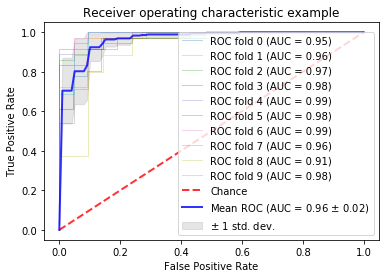

In [10]:
cv = StratifiedKFold(n_splits=10)
kernel_lr=Kernel_LR()


tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, Y):

    kernel_lr.train(X[train,:], Y[train])
    probas_ = kernel_lr.predict_proba(X[test, :])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(Y[test], probas_)
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [11]:
"""3. soft-margin kernal svm"""
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import train_test_split

In [12]:
class Soft_Margin_Kernel_SVM():
    def __init__(self,C=0.1,epochs=100):
        self.C=C
        self.epochs=epochs


    def train(self,X,Y):
        self.X=X
        self.Y=Y
        self.K=np.dot(self.X,self.X.T)

        self.u=np.random.uniform(-20,20,(X.shape[0],1))
        self.b=np.random.uniform(-20,20,(1,))

        for epoch in range(self.epochs):
            out=np.dot(self.u.T,self.K)+self.b
            yy=Y*out.reshape((-1,))

            du=-self.C*np.sum((yy<1)*Y*self.K,1)+np.dot(self.K,self.u).reshape((-1,))

            db=-self.C*np.sum((yy<1)*Y)

            self.u-=du.reshape((-1,1))
            self.b-=db

    def predict(self,X):
        K=np.dot(self.X,X.T)
        Y_=np.dot(self.u.T,K)+self.b
        YY=np.zeros_like(Y_)
        YY[Y_>0]=1
        YY[Y_<0]=-1
        pro=Y_.reshape((-1,))
        pro=(pro-np.min(pro))/(np.max(pro)-np.min(pro))
        return YY.reshape((-1,)),pro

    def score(self,X,Y):
        K=np.dot(self.X,X.T)
        Y_=np.dot(self.u.T,K)+self.b
        Y_[Y_>0]=1
        Y_[Y_<0]=-1

        return np.sum(Y_.reshape((-1,))==Y)/Y.shape[0]

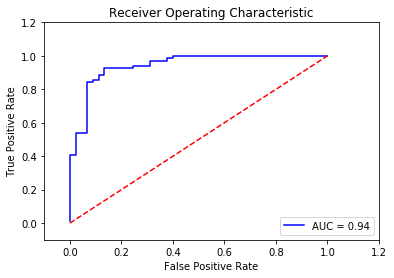

accuracy=39.4737%


In [13]:
np.random.seed(1234)
data = load_breast_cancer()
X=data['data']
#normalize to [0,1]
X=(X-np.min(X,0))/(np.max(X,0)-np.min(X,0))
Y=data['target']
Y[Y==0]=-1
#split train data and test data
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

linear_svm=Soft_Margin_Kernel_SVM(C=0.0001,epochs=50)
linear_svm.train(x_train,y_train)


_,Y_pro=linear_svm.predict(x_test)


false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, Y_pro)
roc_auc = auc(false_positive_rate, true_positive_rate)
 
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print('accuracy={:.4f}%'.format(linear_svm.score(x_test,y_test)*100))